In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from tabulate import tabulate 

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\mushe\\Documents\\Prodighy'

In [4]:
os.chdir('C:\\Users\\mushe\\Downloads')

In [7]:
data = pd.read_csv("admission.csv")

In [8]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
data.shape

(500, 9)

In [12]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
data.drop(['Serial No.'], axis=1, inplace=True)

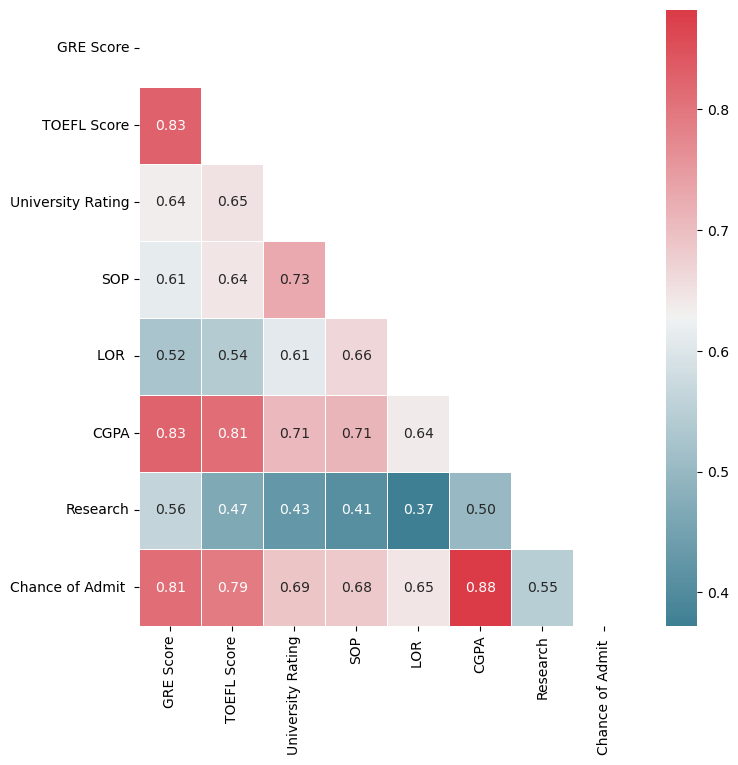

In [16]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")

model_df = {}


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    model_df[name] = (np.sqrt(mean_squared_error(y_test, predictions)))

Results...
DecisionTree : 0.08935882720806042
Linear Regression : 0.04293220746251857
RandomForest : 0.05132894115408968
KNeighbours : 0.06980687645210894
SVM : 0.07329997552068902
AdaBoostClassifier : 0.057320033986389435
GradientBoostingClassifier:  0.048325728633016415
Xgboost:  0.06125114242144523
Lasso:  0.11488570174881235
Ridge:  0.04289400118357372
BayesianRidge:  0.0428968053533
ElasticNet:  0.08739127414117272
HuberRegressor:  0.058259448206323845


C:\Users\mushe\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
x = df.iloc[:, :-1].values # Independent Var x
y = df.iloc[:, -1].values  # Dependent Var y


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, shuffle=False)
# If the "chance of admit" is greater than "80" then the admission is confirmed means "1"
y_train = [1 if each > 0.8 else 0 for each in y_train]
# If the "chance of admit" is lower than "80" then the admission is not confirmed means "0"
y_test = [1 if each > 0.8 else 0 for each in y_test]
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print('MSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

[[73  2]
 [ 3 22]]
Accuracy: 95.00%
MSE: 0.22360679774997896


In [21]:
p = pd.DataFrame(data=model_df.values(), columns=['models'], index=model_df.keys())
model_df
p.sort_values(by=['models'])

,models
Ridge:,0.042894
BayesianRidge:,0.042897
Linear Regression :,0.042932
GradientBoostingClassifier:,0.048326
RandomForest :,0.051329
AdaBoostClassifier :,0.057320
HuberRegressor:,0.058259
Xgboost:,0.061251
KNeighbours :,0.069807
SVM :,0.073300


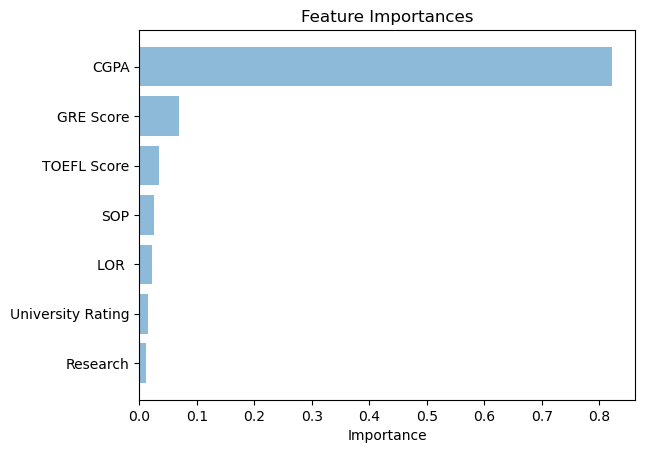

In [22]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

target = data['Chance of Admit ']
mc_data = data.drop(['Chance of Admit '], axis=1)


vif = pd.DataFrame()
vif["variables"] = mc_data.columns
vif["VIF"] = [variance_inflation_factor(mc_data.values, i) for i in range(mc_data.shape[1])]

# Print the VIF values
print(vif)

# Remove features with high VIF
threshold = 5
while max(vif["VIF"]) > threshold:
    # Get the feature with the highest VIF
    max_vif_feature = vif.loc[vif["VIF"].idxmax(), "variables"]
    # Remove the feature from the dataset and VIF table
    mc_data = mc_data.drop(columns=[max_vif_feature])
    vif = vif.drop(vif[vif["variables"] == max_vif_feature].index)
    # Recalculate VIF values
    vif["VIF"] = [variance_inflation_factor(mc_data.values, i) for i in range(mc_data.shape[1])]

# Print the remaining features
print(mc_data.columns)

           variables          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493
Index(['TOEFL Score', 'Research'], dtype='object')


In [24]:
X = mc_data
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, min_samples_leaf=1)],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")

model_df = {}


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    model_df[name] = (np.sqrt(mean_squared_error(y_test, predictions)))

Results...
DecisionTree : 0.08599500289187416
Linear Regression : 0.07556458149514082
RandomForest : 0.08249375579772764
KNeighbours : 0.10805785487413677
SVM : 0.08220559870748548
AdaBoostClassifier : 0.07924201751232314
GradientBoostingClassifier:  0.07986111487529603
Xgboost:  0.08505122248692498
Lasso:  0.13524648793961344
Ridge:  0.07558234847140803
BayesianRidge:  0.07563280921136563
ElasticNet:  0.11262203346095394
HuberRegressor:  0.07632026342322737


In [27]:
p['models without multicollinearity'] = model_df.values()
p.sort_values(by=['models without multicollinearity'])

,models,models without multicollinearity
Linear Regression :,0.042932,0.075565
Ridge:,0.042894,0.075582
BayesianRidge:,0.042897,0.075633
HuberRegressor:,0.058259,0.076320
AdaBoostClassifier :,0.057320,0.079242
GradientBoostingClassifier:,0.048326,0.079861
SVM :,0.073300,0.082206
RandomForest :,0.051329,0.082494
Xgboost:,0.061251,0.085051
DecisionTree :,0.089359,0.085995


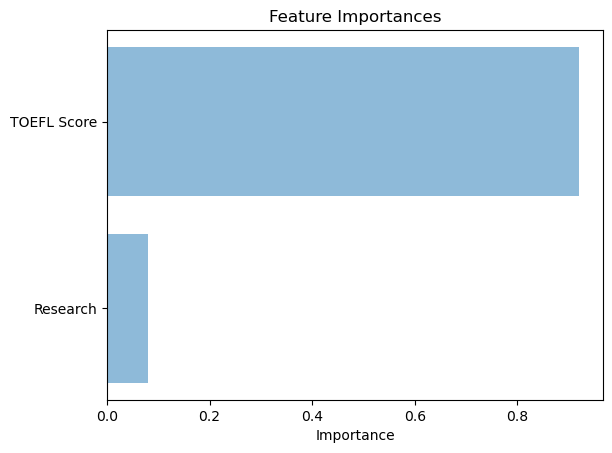

In [28]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

plt.barh([1,2], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()